In [3]:
import nltk
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import string

In [4]:
files = inaugural.fileids()
print(files)

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [5]:
def create_inaugural_wordcloud():
    speech_corpus = ' '.join(inaugural.raw(fileid) for fileid in inaugural.fileids())
    
    tokens = word_tokenize(speech_corpus.lower())

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens 
             if word not in stop_words 
             and word not in string.punctuation
             and word.isalnum()]

    word_freq = Counter(tokens)

    wordcloud = WordCloud(
        width=1600,
        height=800,
        background_color='white',
        max_words=100,
        contour_width=3,
        contour_color='steelblue'
    ).generate_from_frequencies(word_freq)
    
    # Display the word cloud
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('US Presidential Inaugural Speech Word Cloud', pad=20)
    plt.show()
    
    return word_freq

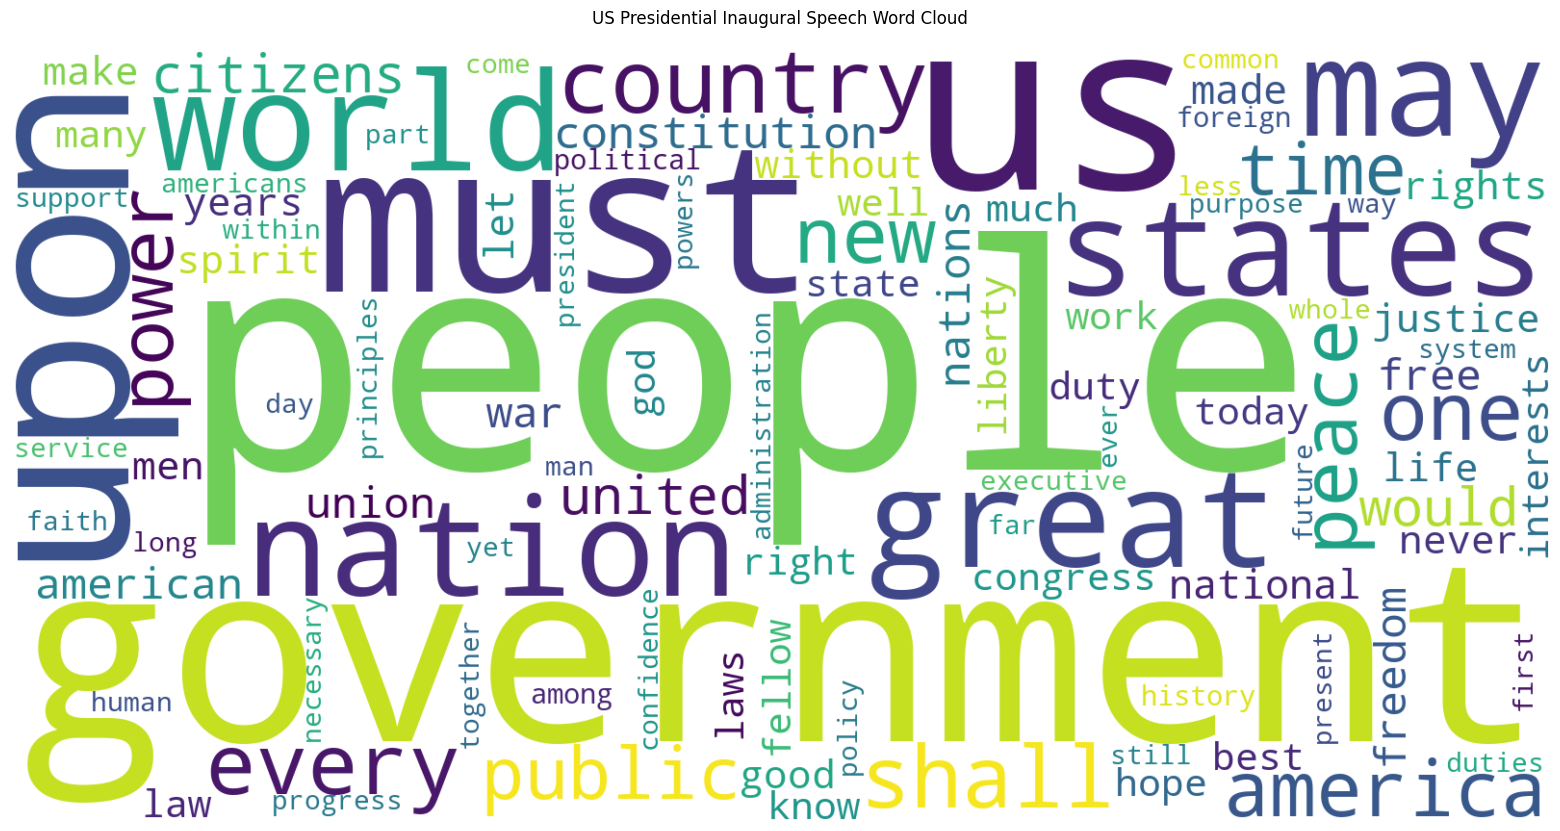

In [6]:
word_frequencies = create_inaugural_wordcloud()

In [7]:
from nltk.probability import FreqDist, ConditionalFreqDist

def freq_analysis():
    word_frequencies = FreqDist()
    cfd = ConditionalFreqDist()
    stop_words = set(stopwords.words('english'))
    for fileid in inaugural.fileids():
        year=fileid.split('-')[0]
        speech = inaugural.raw(fileid)
        tokens = word_tokenize(speech.lower())
        clean_token = [
            word for word in tokens if word not in stop_words and word not in string.punctuation and word.isalnum()
        ]
        word_frequencies.update(clean_token)
        for word in clean_token:
            cfd[year][word] += 1
        return word_frequencies,cfd